This was to do some inital testing to see what difference adding the beta features had, and see if there was any relationship between initial orbital configurations and the resulting weibull parameters.

In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import corner
import time 
from scipy import stats

In [17]:
"{0:.4f}".format(31214.41)
#load info fot this to work
info = pd.read_csv("../Figures/MCMCFigures/Weibull_Parameters.csv", index_col = 0)
info.head()

'31214.4100'

Load initial orbital elements and short int features, to see if there is any correlation between any orbital feature and its parameters for the Weibull distribution

In [46]:
initial_feats = pd.read_csv("../csvs/initial_orbital_elements.csv", index_col = 0)
short_int_feats1 = pd.read_csv("../csvs/short_integration_features.csv", index_col = 0)
short_int_feats2 = pd.read_csv("../csvs/sifOrbs=10000.0Nout=100window=10.csv", index_col=0)
print short_int_feats1.shape, short_int_feats2.shape, initial_feats.shape, 
feats = ["runstring", "Stable",  "Rel_Eerr"]
initial_feats = initial_feats.drop(feats, axis = 1)
feats = feats + ["t_final_short", "Rel_Eerr_short"]
short_int_feats1 = short_int_feats1.drop(feats, axis = 1)
short_int_feats2 = short_int_feats2.drop(feats, axis = 1)
#initial_feats["runstring"]

(14999, 118) (24999, 118) (25000, 32)


In [47]:
initial_feats.head()

,instability_time,RHill12,RHill23,beta12,beta23,m1,a1,P1,e1,pomega1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
0,1.235644e+07,0.026033,0.023222,8.508586,15.826967,3.414016e-05,1.0,0.999983,0.005031,3.171041,...,1.573978,-0.567081,1.826900e-06,1.589043,2.003050,0.002515,-0.108162,0.065498,-1.192440,-0.614709
1,1.348749e+05,0.022704,0.031284,8.397002,15.367618,2.529838e-07,1.0,1.000000,0.010350,-3.564030,...,-1.749616,1.437355,1.955797e-05,1.671403,2.160777,0.072450,-0.343874,0.046939,-0.619350,0.192203
2,1.276381e+04,0.036304,0.032149,3.461288,25.229467,7.380789e-05,1.0,0.999963,0.051912,0.995149,...,-0.032550,-0.317958,1.477931e-07,1.936762,2.695151,0.003395,3.419165,0.014535,2.795101,1.685406
3,1.000000e+09,0.011704,0.014963,18.513681,19.145889,5.174804e-07,1.0,1.000000,0.000152,-3.328433,...,0.946351,-2.294238,1.287851e-06,1.503164,1.842927,0.057380,-0.829096,0.098014,-2.995941,-1.625763
4,8.791888e+01,0.006199,0.008634,5.494196,2.928938,5.106746e-07,1.0,1.000000,0.001457,1.738448,...,-0.455684,-1.074927,1.542321e-06,1.059346,1.090326,0.010325,-1.214839,0.011840,-1.253823,1.215392


In [48]:
short_int_feats1.head()

,instability_time,avg_a1,std_a1,max_a1,min_a1,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,avg_e1,...,avg_iH3,std_iH3,max_iH3,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,Lyapunov_time
0,1.235644e+07,1.000165,0.000329,1.001248,0.999691,0.000329,0.001083,0.000214,0.000456,0.026837,...,4.706365,0.263380,5.264568,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,9041.175397
1,1.348749e+05,0.999952,0.000739,1.002089,0.998309,0.000739,0.002137,0.000202,0.000463,0.072442,...,1.777638,0.610370,2.507803,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,2192.382019
2,1.276381e+04,0.998498,0.001948,1.002043,0.995446,0.001951,0.003550,0.001735,0.002860,0.045491,...,0.982187,0.060058,1.060480,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,2191.525922
3,1.000000e+09,1.000006,0.000026,1.000126,0.999973,0.000026,0.000120,0.000005,0.000009,0.002050,...,9.848375,0.070031,9.914136,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,58599.215966
4,8.791888e+01,1.067267,0.030186,1.121364,1.000000,0.028284,0.063028,0.004313,0.010716,0.044305,...,1.453843,0.726529,2.660701,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,43524.152375


In [49]:
short_int_feats2.head()

,avg_a1,std_a1,max_a1,min_a1,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,avg_e1,std_e1,...,std_iH3,max_iH3,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,instability_time
0,1.000165,0.000329,1.001248,0.999691,0.000329,0.001083,0.000214,0.000456,0.026837,0.012621,...,0.263380,5.264568,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.426176,1.235644e+07
1,0.999952,0.000739,1.002089,0.998309,0.000739,0.002137,0.000202,0.000463,0.072442,0.028927,...,0.610370,2.507803,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.413135,1.348749e+05
2,0.998498,0.001948,1.002043,0.995446,0.001951,0.003550,0.001735,0.002860,0.045491,0.009447,...,0.060058,1.060480,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.389253,1.276381e+04
3,1.000006,0.000026,1.000126,0.999973,0.000026,0.000120,0.000005,0.000009,0.002050,0.001296,...,0.070031,9.914136,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.383152,1.000000e+09
4,1.067267,0.030186,1.121364,1.000000,0.028284,0.063028,0.004313,0.010716,0.044305,0.021913,...,0.726529,2.660701,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.395781,8.791888e+01


In [ ]:
[max(x) for x in initial_feats[["e1", "e2", "e3"]].values]

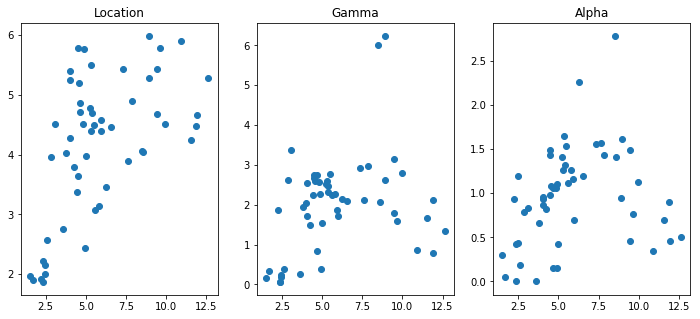

In [135]:
indices  = info["ID"].astype(int).values
trimmed_short_int = short_int_feats2.loc[indices]
trimmed_initial = initial_feats.loc[indices]
trimmed_initial["avgbeta"] = (trimmed_initial["beta12"] * trimmed_initial["beta23"])/ (trimmed_initial["beta12"] + trimmed_initial["beta23"])
#bad feature
trimmed_initial["avg_e"] = trimmed_initial["e1"]**2 + trimmed_initial["e2"]**2+  trimmed_initial["e3"]**2 #)/ \
        #(trimmed_initial["e1"] + trimmed_initial["e2"] + trimmed_initial["e3"])
trimmed_initial["avg_RH/e"] = trimmed_initial["avgbeta"] / [max(x) for x in trimmed_initial[["e1", "e2", "e3"]].values]
trimmed_initial["logt"] = np.log10(trimmed_initial["instability_time"])

#indices
param = "avgbeta"
param2 = "e1"
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot("131")
ax2 = fig.add_subplot("132")
ax3 = fig.add_subplot("133")
ax1.scatter(trimmed_initial[param] , info["Location"])
ax1.set_title("Location")
ax2.scatter( trimmed_initial[param] , info["Gamma"])
ax2.set_title("Gamma")
ax3.scatter(trimmed_initial[param] , info["Alpha"])
ax3.set_title("Alpha")

plt.show()
#logt had linear relationship with location which is to be expected
#alpha denotes how spread out the distribution is
#gamma les than one, has a tapered top, rounded if greater than one 

In [150]:
more_feats = pd.read_csv("../csvs/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
trimmed_more_feats  = more_feats.loc[indices]
#trimmed_short_int = short_int_feats2.loc[indices]
print trimmed_more_feats.columns.values[:30]
trimmed_more_feats.head()

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1']


,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07
1174,0001174.bin,10000.0,7.786560e-09,9.639461,0.104693,9.387339,10.061239,4.549205,0.032399,4.397870,...,0.873797,0.203180,0.005754,0.068399,0.058424,1.434309e-12,0.252911,0.0,7.195121e+04,1.296026e-07
12073,0012073.bin,10000.0,2.054317e-09,5.381200,0.046931,5.196776,5.463198,20.373992,0.029561,20.319451,...,0.300803,0.020564,0.003191,0.017858,0.001391,-2.391101e-11,0.392688,0.0,6.046899e+04,1.755339e-07
12840,0012840.bin,10000.0,8.538402e-10,5.011552,0.190538,4.687759,5.459410,29.848808,0.007760,29.827387,...,0.022126,0.026315,0.017849,0.001793,0.000499,9.668255e-13,0.293413,0.0,1.994020e+05,6.454656e-07
13362,0013362.bin,10000.0,3.205639e-04,15.180236,11.189947,-6.526938,32.075308,-1.758383,17.267010,-23.963283,...,2.388276,0.157065,0.018752,0.211224,0.003627,-5.543712e-10,0.350045,0.0,7.482249e+01,5.935752e-08


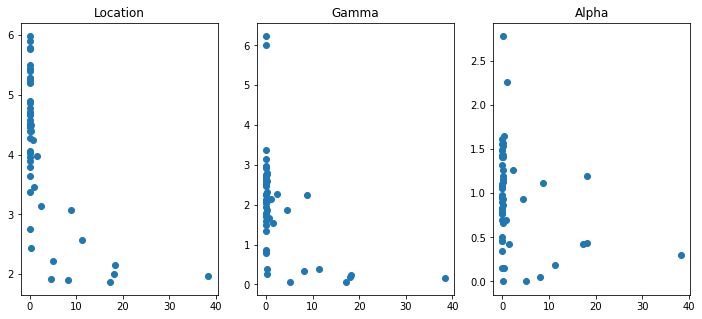

In [151]:
trimmed_more_feats["avgbeta"] = (trimmed_more_feats["avg_beta12"] * trimmed_more_feats["avg_beta23"])  /\
            (trimmed_more_feats["avg_beta12"] + trimmed_more_feats["avg_beta23"])
param = "std_beta23"
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot("131")
ax2 = fig.add_subplot("132")
ax3 = fig.add_subplot("133")
ax1.scatter(trimmed_more_feats[param] , info["Location"])
ax1.set_title("Location")
ax2.scatter( trimmed_more_feats[param] , info["Gamma"])
ax2.set_title("Gamma")
ax3.scatter(trimmed_more_feats[param] , info["Alpha"])
ax3.set_title("Alpha")

plt.show()
#logt had linear relationship with location which is to be expected
#alpha denotes how spread out the distribution is
#gamma les than one, has a tapered top, rounded if greater than one 

In [199]:
#{'x_min_child': 4.0, 'x_tree_colsample': 0.7452992521028268, 'x_max_depth': 7.0, 'x_subsample': 0.938790987639708, 'x_learning_rate': 0.08584312332127479}
model = xgb.XGBClassifier(n_estimators=200, subsample= 0.938, colsample_bytree= 0.745, max_depth=7, seed =  0, learning_rate=0.085)
xgb_params = model.get_xgb_params()


In [200]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

def check_scores(X, Y, xgb_params):
    d_cv = xgb.DMatrix(X, Y)
    results = xgb.cv(xgb_params, d_cv, early_stopping_rounds=10, metrics="auc", nfold=5, stratified=True, seed=0, verbose_eval=True)
    print results

    trainX, testX, trainY, testY = train_test_split(X, Y, random_state = 0, stratify = Y, test_size = 0.2)
    dtrain = xgb.DMatrix(trainX, trainY)
    dtest = xgb.DMatrix(testX)

    bst = xgb.train(xgb_params, dtrain)
    preds = bst.predict(dtest)
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
    plt.plot(precision, recall)
    plt.title("AUC Score {0}".format(metrics.average_precision_score(testY, preds)))
    plt.show()


    for i in range(0,len(recall), 40):
        print("Threshold {0}, Precision = {1}, Recall = {2}".format(thresholds[i], precision[i], recall[i]))

    feat_scores = pd.Series(bst.get_fscore()).sort_values(ascending=False)[:20]
    feat_scores.plot(kind = "bar", title = "Feature Importances", figsize = (12, 4))
    indices_name = feat_scores.index
    new_feats_appearance = [("beta" in x)*1 for x in indices_name]
    print new_feats_appearance, sum(new_feats_appearance), "/20."
    plt.show()

In [189]:
#train on all features, see if the new ones are of any use, see how performance changes
import xgboost as xgb
more_feats = pd.read_csv("../csvs/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
drop_feats = ['runstring', 't_final_short', 'Rel_Eerr_short','wall_time' ,'Stable' ,'instability_time' ,'Rel_Eerr']
Y = more_feats["Stable"]
X = more_feats.drop(drop_feats, axis = 1)


[0]	train-auc:0.975451+0.00117742	test-auc:0.963954+0.00368368
[1]	train-auc:0.982965+0.000389127	test-auc:0.970787+0.00198327
[2]	train-auc:0.985229+0.000548137	test-auc:0.973435+0.00188141
[3]	train-auc:0.986782+0.000236389	test-auc:0.975082+0.00192237
[4]	train-auc:0.987607+0.000284178	test-auc:0.975883+0.00161872
[5]	train-auc:0.988216+0.00020702	test-auc:0.976575+0.00179854
[6]	train-auc:0.988807+0.000275746	test-auc:0.976902+0.00182542
[7]	train-auc:0.98925+0.000186191	test-auc:0.977311+0.00178697
[8]	train-auc:0.989615+0.000229922	test-auc:0.977615+0.00168655
[9]	train-auc:0.990088+0.000176431	test-auc:0.978128+0.00165977
   test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0       0.963954      0.003684        0.975451       0.001177
1       0.970787      0.001983        0.982965       0.000389
2       0.973435      0.001881        0.985229       0.000548
3       0.975082      0.001922        0.986782       0.000236
4       0.975883      0.001619        0.987607       

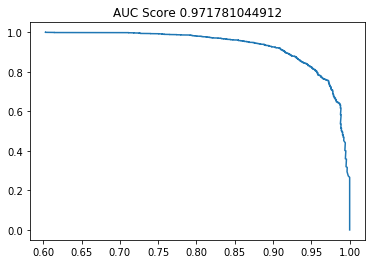

Threshold 0.219076931477, Precision = 0.602798053528, Recall = 1.0
Threshold 0.220677956939, Precision = 0.610169491525, Recall = 0.998990918264
Threshold 0.222311288118, Precision = 0.6184375, Recall = 0.998486377397
Threshold 0.224050149322, Precision = 0.626860943934, Recall = 0.998486377397
Threshold 0.22630161047, Precision = 0.635313001605, Recall = 0.998486377397
Threshold 0.227732539177, Precision = 0.643786597267, Recall = 0.998486377397
Threshold 0.230396464467, Precision = 0.653350940905, Recall = 0.998486377397
Threshold 0.232300788164, Precision = 0.662537663207, Recall = 0.998486377397
Threshold 0.235686436296, Precision = 0.671986417657, Recall = 0.998486377397
Threshold 0.238334551454, Precision = 0.681239242685, Recall = 0.998486377397
Threshold 0.241509020329, Precision = 0.6907504363, Recall = 0.998486377397
Threshold 0.246775239706, Precision = 0.700673042862, Recall = 0.997981836529
Threshold 0.252085834742, Precision = 0.710743801653, Recall = 0.997981836529
Thres

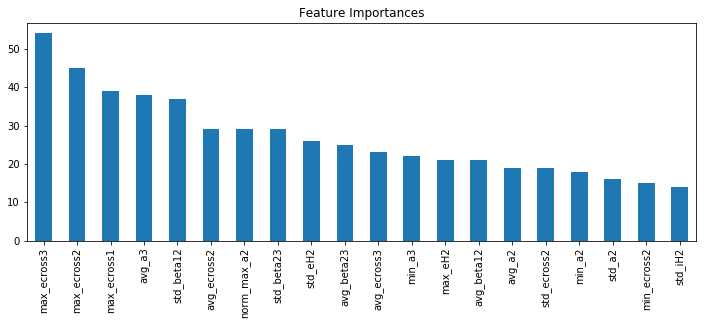

In [201]:
check_scores(X, Y, xgb_params)

In [190]:
short_int_feats2 = pd.read_csv("../csvs/sifOrbs=10000.0Nout=100window=10.csv", index_col=0)
newY = short_int_feats2["Stable"]
drop_feats = ["runstring", "Stable",  "Rel_Eerr", "t_final_short", "Rel_Eerr_short" , 'wall_time', 'instability_time']
newX = short_int_feats2.drop(drop_feats, axis = 1)

[0]	train-auc:0.971783+0.00145059	test-auc:0.958096+0.00234418
[1]	train-auc:0.979918+0.00165312	test-auc:0.967858+0.00283443
[2]	train-auc:0.982598+0.00131846	test-auc:0.970555+0.00224141
[3]	train-auc:0.984168+0.00102784	test-auc:0.972224+0.00143512
[4]	train-auc:0.985354+0.000757783	test-auc:0.973781+0.00148605
[5]	train-auc:0.986393+0.000675557	test-auc:0.975002+0.00139024
[6]	train-auc:0.987118+0.000690438	test-auc:0.975591+0.00130765
[7]	train-auc:0.987776+0.000546876	test-auc:0.976172+0.00144941
[8]	train-auc:0.988285+0.000528805	test-auc:0.976628+0.00154135
[9]	train-auc:0.988749+0.000393088	test-auc:0.977006+0.00160257
   test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0       0.958096      0.002344        0.971783       0.001451
1       0.967858      0.002834        0.979918       0.001653
2       0.970555      0.002241        0.982598       0.001318
3       0.972224      0.001435        0.984168       0.001028
4       0.973781      0.001486        0.985354       0

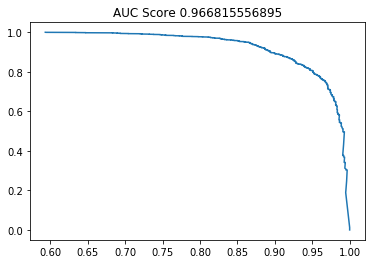

Threshold 0.21792010963, Precision = 0.593058049072, Recall = 1.0
Threshold 0.219653189182, Precision = 0.602677213264, Recall = 0.999495459132
Threshold 0.22106911242, Precision = 0.61217552534, Recall = 0.999495459132
Threshold 0.222627133131, Precision = 0.62119786767, Recall = 0.999495459132
Threshold 0.224903911352, Precision = 0.629170638704, Recall = 0.998990918264
Threshold 0.227438375354, Precision = 0.637359098229, Recall = 0.998486377397
Threshold 0.230688124895, Precision = 0.645983017636, Recall = 0.997981836529
Threshold 0.234420910478, Precision = 0.654304635762, Recall = 0.996972754793
Threshold 0.237821996212, Precision = 0.663087248322, Recall = 0.996972754793
Threshold 0.241014614701, Precision = 0.672337529772, Recall = 0.996972754793
Threshold 0.244781702757, Precision = 0.681614349776, Recall = 0.996972754793
Threshold 0.248182207346, Precision = 0.690101434068, Recall = 0.99545913219
Threshold 0.252378046513, Precision = 0.69907735983, Recall = 0.993945509586
Thr

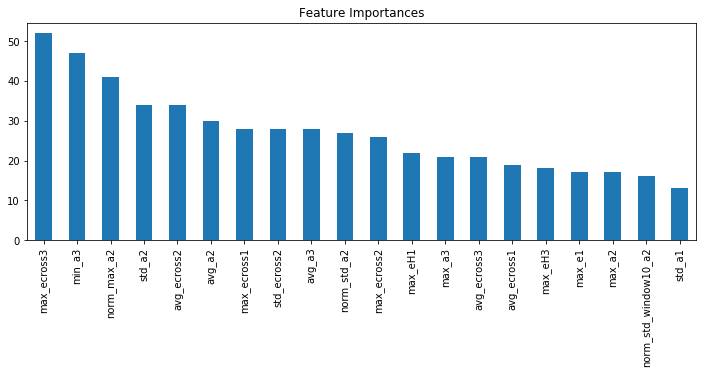

In [202]:
check_scores(newX, newY, xgb_params)

(24999, 119) (24999,)
Time 13.379650116
(24999, 111) (24999,)
Time 11.4720919132


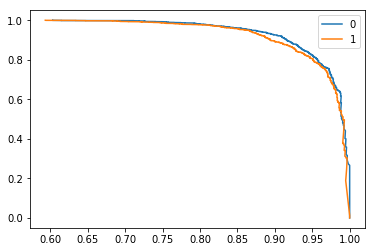

In [203]:
import time
data = [(X, Y), (newX, newY)]
preds = []
fig = plt.figure()
ax = fig.add_subplot("111")
for i, vals in enumerate(data):
    X_vals = vals[0]
    Y_vals = vals[1]
    print X_vals.shape, Y_vals.shape
    trainX, testX, trainY, testY = train_test_split(X_vals, Y_vals, random_state = 0, stratify = Y_vals, test_size = 0.2)
    dtrain = xgb.DMatrix(trainX, trainY)
    dtest = xgb.DMatrix(testX)
    start = time.time()
    bst = xgb.train(xgb_params, dtrain)
    end = time.time()
    print "Time" , (end - start)
    preds = bst.predict(dtest)
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
    ax.plot(precision, recall, label = str(i))
plt.legend()
plt.show()

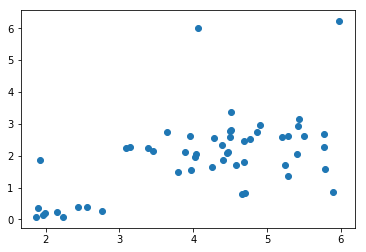

In [206]:
plt.scatter(info["Location"], info["Gamma"])
plt.show()

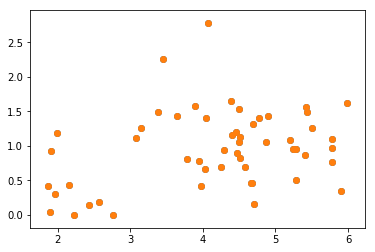

In [208]:
plt.scatter(info["Location"], info["Alpha"])
plt.show()

In [212]:
print np.std(info[["Location", "Alpha", "Gamma"]])
print np.min(info[["Location", "Alpha", "Gamma"]])
print np.max(info[["Location", "Alpha", "Gamma"]])

Location    1.174050
Alpha       0.553093
Gamma       1.217972
dtype: float64
Location    1.874032
Alpha       0.000018
Gamma       0.058621
dtype: float64
Location    5.983538
Alpha       2.776709
Gamma       6.238803
dtype: float64


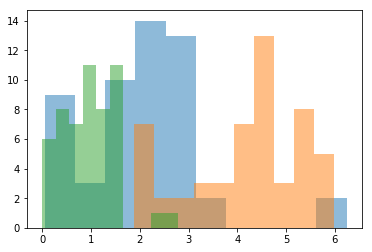

In [216]:
plt.hist(info["Gamma"], alpha = 0.5)
plt.hist(info["Location"], alpha = 0.5)
plt.hist(info["Alpha"], alpha = 0.5)
plt.show()